### K-nn 예시


n_neighbors=1 

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


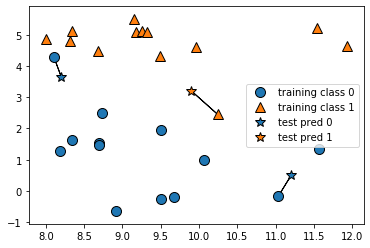

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

n_neighbors=3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


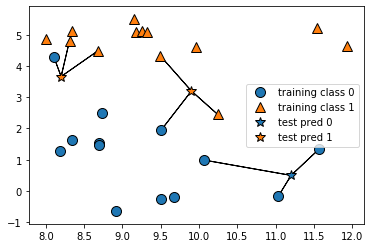

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Decision boundary by k(1,3,9)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


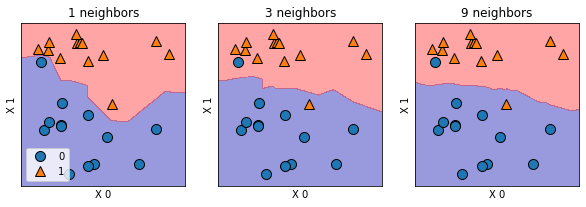

In [4]:
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

fig, axes = plt.subplots(1,3,figsize= (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax )
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("X 0")
    ax.set_ylabel("X 1")
    
axes[0].legend(loc=3)

### 3. Importing and preperation of data

#### 3.1 Import libraries

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
os.getcwd()

'C:\\Users\\USER\\Desktop'

In [7]:
os.chdir('C://Users/USER/Desktop/파이썬')

In [8]:
# Importing the dataset
dataset = pd.read_csv('./Iris.csv')

#### 3.3 Summarize the Dataset

In [9]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 6)

In [10]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# Let’s now take a look at the number of instances (rows) that belong to each class. 
#We can view this as an absolute count.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 3.4 Dividing data into features and labels
####### NOTE: iris 데이터는 6개의 변수를 가지고 있다(Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species)

In [13]:
# 먼저 우리는  X(features)와 y(labels)로 나누어야 한다.
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### 3.5 Label encoding


NOTE: Species는 범주형 변수이다. KNeighborsClassifier는 string 형태를 받아들이지 못하기 때문에 우리는 숫자 형태로 바꿔줘야 한다. Iris-setosa는 0이고, Iris-versicolor는 1 and Iris-virginica는 2로 대체한다

In [14]:
print(y[[48,53,99,102]])

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[[48,53,99,102]])

[0 1 1 2]


#### 3.6 Spliting dataset into training set and test set
이제 모델이 잘 작동하는지 알아보기 위해서 학습셋과 테스트셋으로 나누어보자

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

여기서는 변수 값들이 비슷한 스케일을 가지고 있기 때문에 scaling을 하지 않아도 된다. 그러나 다른 데이터 셋에서는 scaling을 해주는 것이 매우 중요하다.

### 4. Data Visualization

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 

기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다. Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

#### 4.1. Parallel Coordinates

Parallel coordinates는 다변량 데이터를 시각화하기 위한 기법이다. 이를 통해 데이터의 클러스터를 보고 새로운 시각을 얻을 수도 있다. Parallel coordinates는 한 점이 하나의 선분으로 연결된다. 각 수직선은 하나의 속성을 나타낸다.

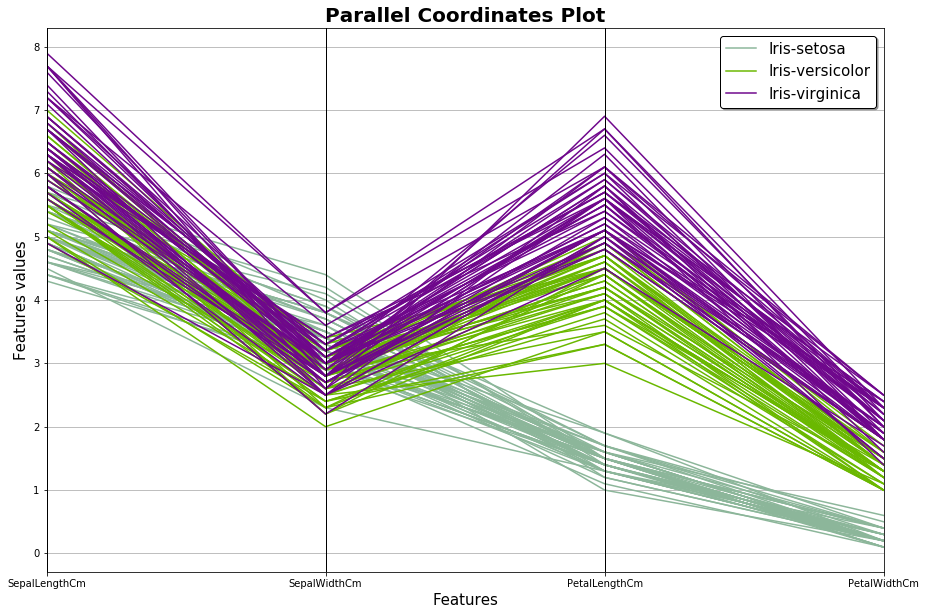

In [19]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### 4.2. Pairplot


Pairwise는 데이터 집합의 하위 집합 내에서 변수의 분포 또는 여러 변수 간의 관계를 시각화하려는 경우에 유용하다.

NOTE: 하나의 꽃 종류는 다른 두 종류와 선형적으로 분리되지만 다른 두 종류는 잘 분리되지 않는다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

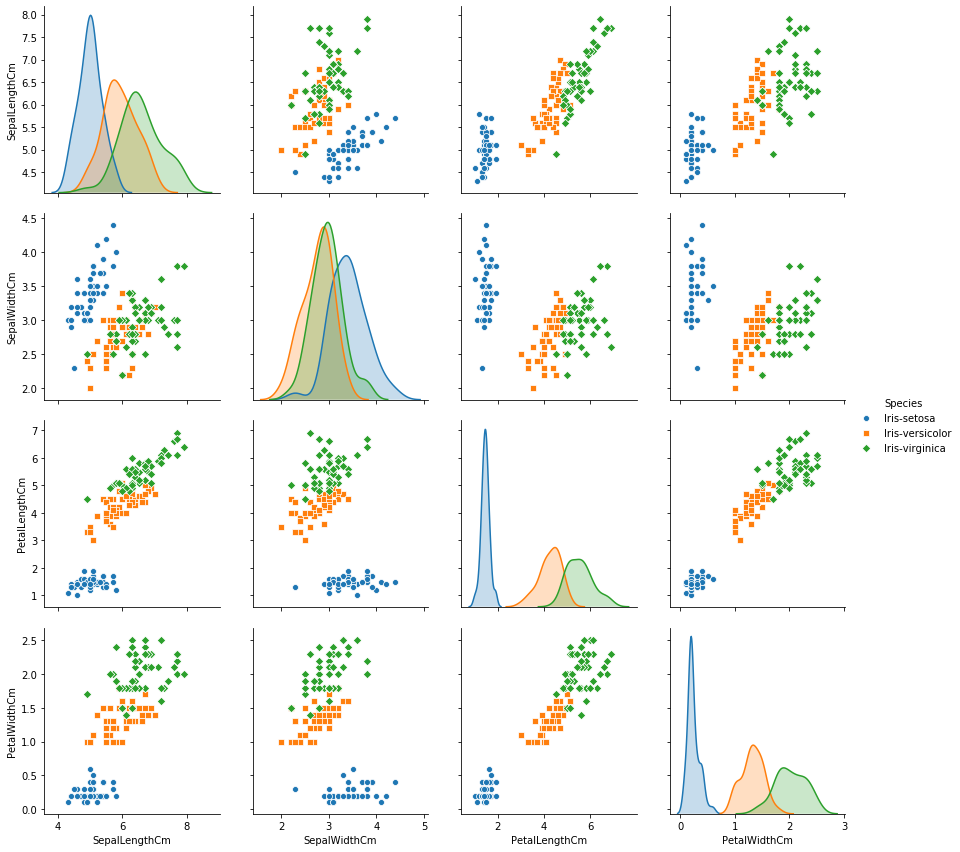

In [20]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

#### 4.3. Boxplots

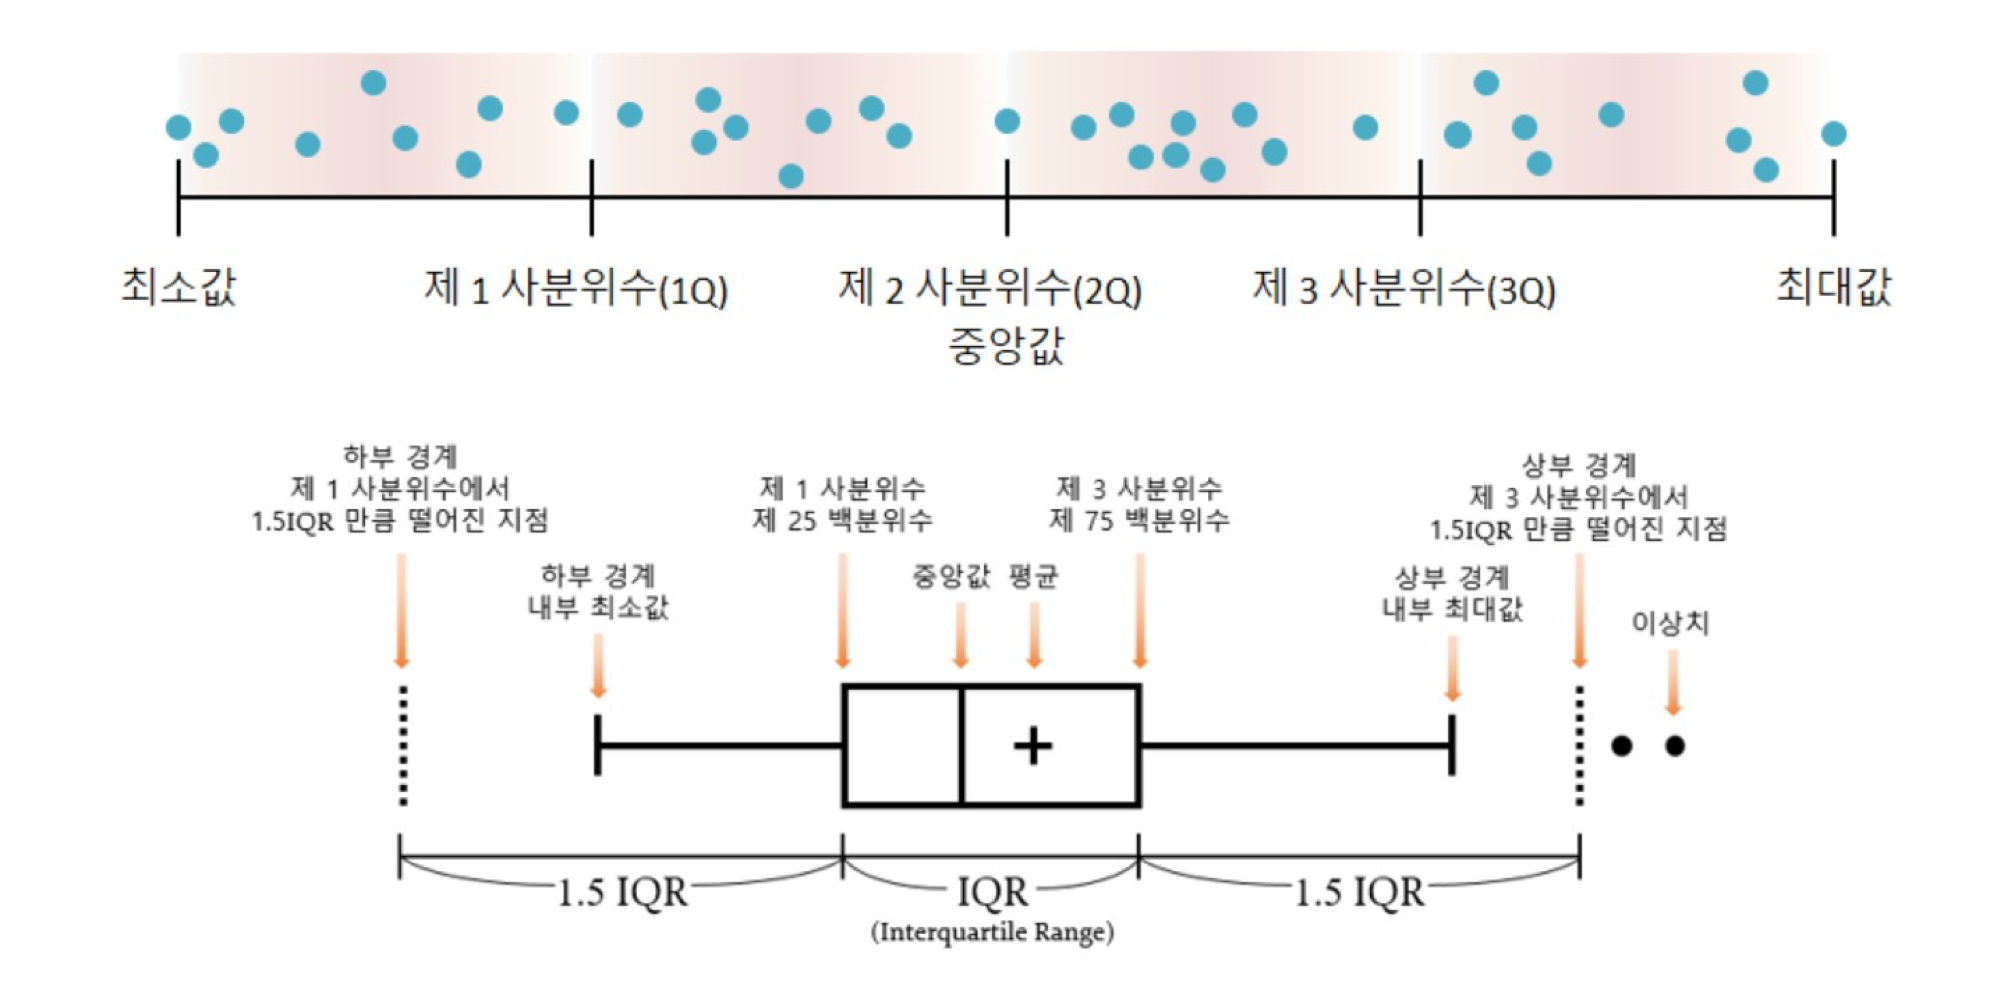

In [22]:
from IPython.display import Image
Image("./boxplot.png")

<Figure size 432x288 with 0 Axes>

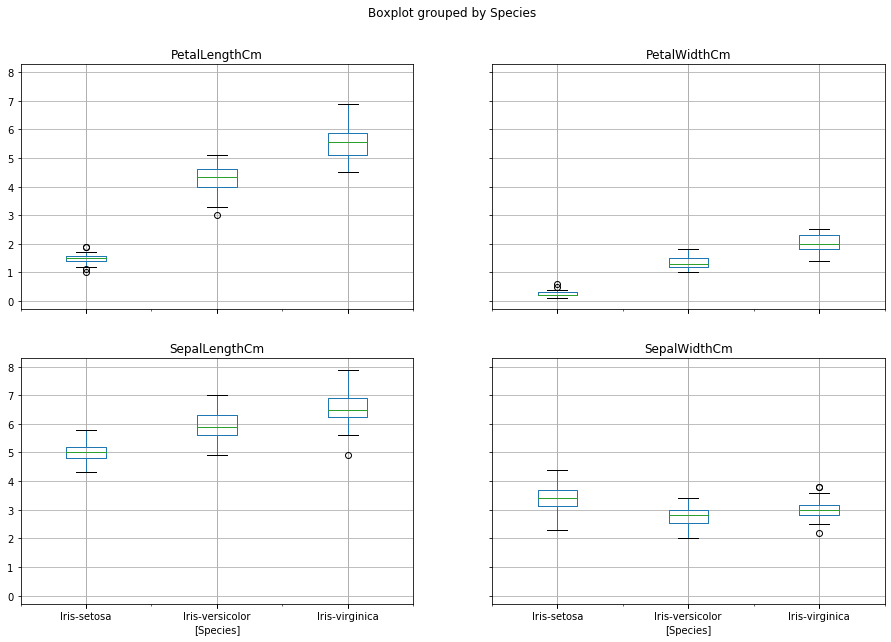

In [23]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

### 4.4. 3D visualization


객체의 색상, 모양, 크기 및 기타 속성을 사용하여 3D로 고차원 데이터 세트를 시각화 할 수도 있다.

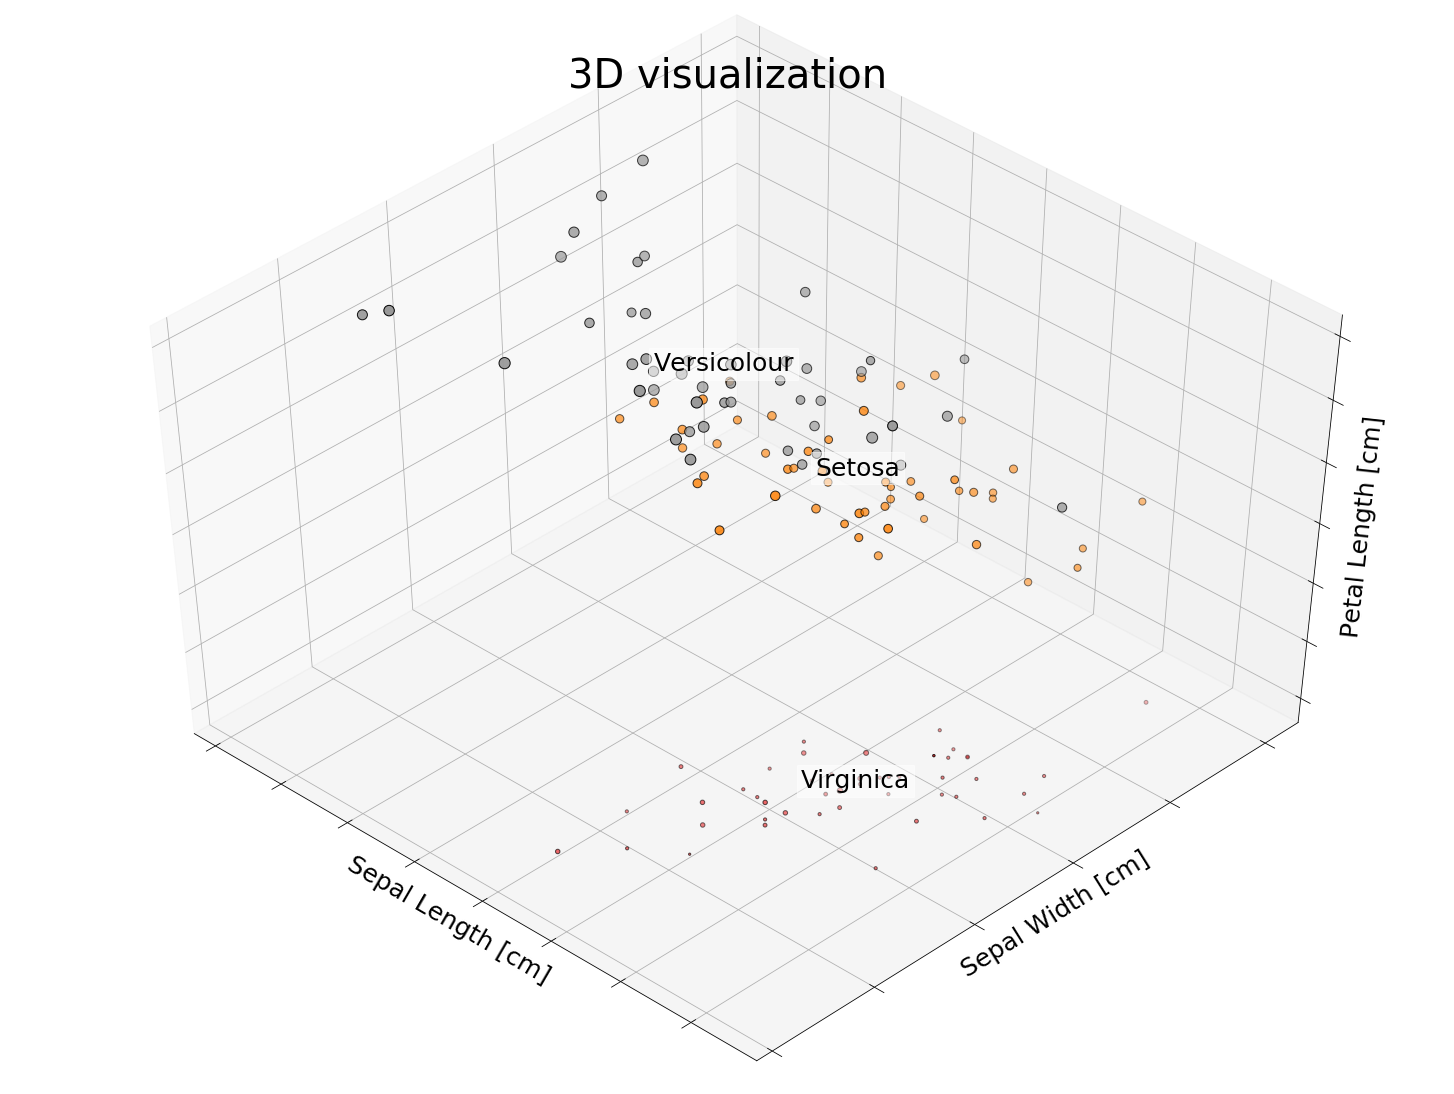

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

# ax.view_init(azim=0)
plt.show()

#### 5. Using KNN for classification¶
5.1. Making predictions

In [25]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## 5.2. Evaluating predictions


Building confusion matrix:

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [27]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


#### 5.3. Using cross-validation for parameter tuning:

In [28]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

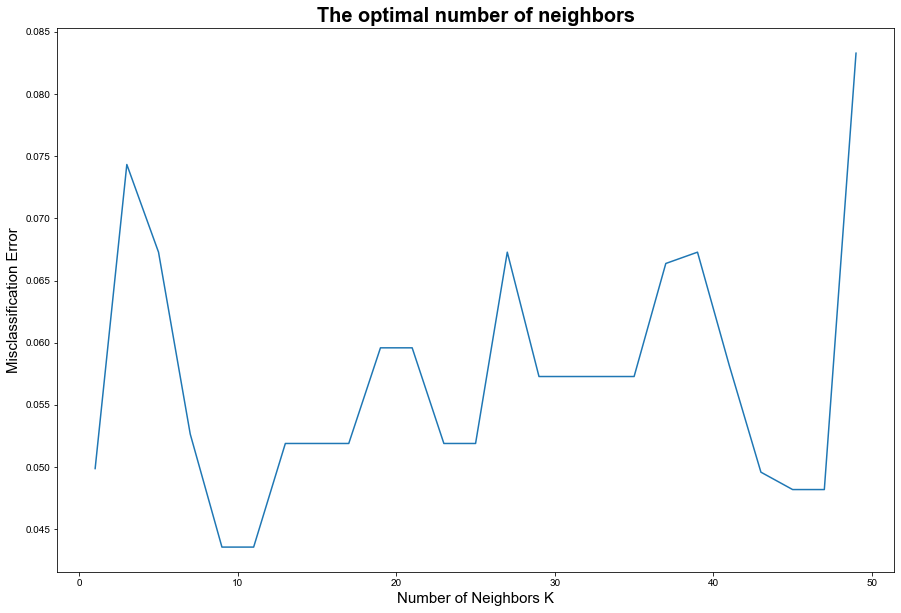

In [29]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [30]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


#### 6. My own KNN implementation

In [31]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [32]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [33]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.
